In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [ ]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [ ]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

You can only unpack the zipped tuple once before it's removed from the memory
<br>when you run `list(lat_lngs)` you get an empty list

In [ ]:
list(lat_lngs)

In [ ]:
coordinates[:10]

In [ ]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates[:5]:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

In [ ]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [ ]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [ ]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [ ]:
len(city_data)

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

In [ ]:
# re-order the columns as required
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Regression plots

In [1]:
# recreate city_data_df
import pandas as pd
city_data_df=pd.read_csv("weather_data/cities.csv")

In [2]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    #import the modules
    from matplotlib import pylab as plt
    from scipy.stats import linregress

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    return {'slope':f"{slope:,.2f}", 'intercept':f"{intercept:,.2f}", 'r_value':f"{r_value:,.2f}", 'p_value':f"{p_value:,.2f}", 'std_err':f"{std_err:,.2f}"}

In [3]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                 Puerto Ayora
Country                        EC
Date          2020-09-29 13:46:58
Lat                         -0.74
Lng                        -90.35
Max Temp                       68
Humidity                       92
Cloudiness                    100
Wind Speed                   5.99
Name: 13, dtype: object

In [4]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

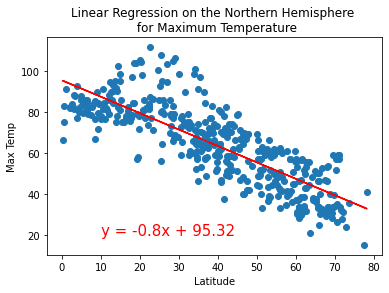

{'slope': '-0.80',
 'intercept': '95.32',
 'r_value': '-0.82',
 'p_value': '0.00',
 'std_err': '0.03'}

In [5]:
# Import linear regression from the SciPy stats module.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
title = "Linear Regression on the Northern Hemisphere \n for Maximum Temperature"
plot_linear_regression(x_values, y_values, title, 'Max Temp',(10,20))

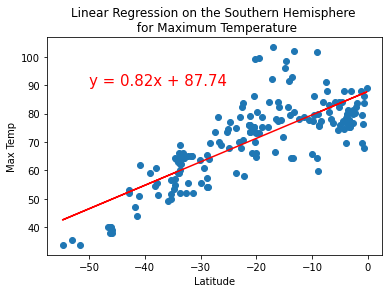

{'slope': '0.82',
 'intercept': '87.74',
 'r_value': '0.78',
 'p_value': '0.00',
 'std_err': '0.05'}

In [6]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
title = 'Linear Regression on the Southern Hemisphere \n for Maximum Temperature'
plot_linear_regression(x_values, y_values, title, 'Max Temp',(-50,90))

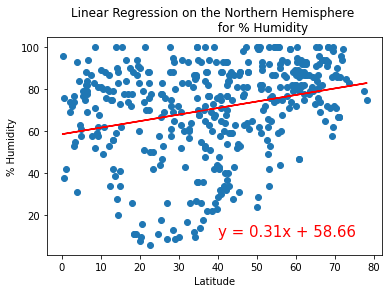

{'slope': '0.31',
 'intercept': '58.66',
 'r_value': '0.27',
 'p_value': '0.00',
 'std_err': '0.05'}

In [7]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Humidity', '% Humidity',(40,10))

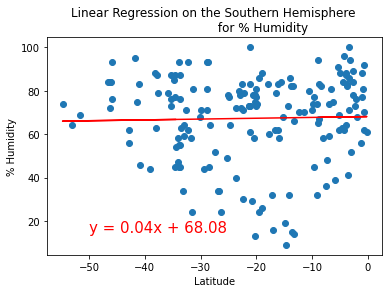

In [8]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
retValue = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for % Humidity', '% Humidity',(-50,15))

In [9]:
retValue

{'slope': '0.04',
 'intercept': '68.08',
 'r_value': '0.03',
 'p_value': '0.74',
 'std_err': '0.11'}

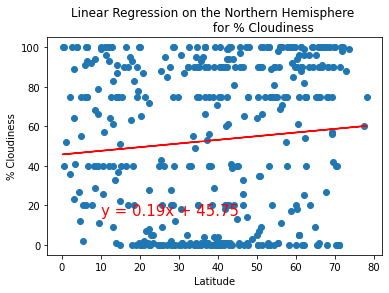

{'slope': '0.19', 'intercept': '45.75', 'r_value': '0.09', 'p_value': '0.06', 'std_err': '0.10'}


In [10]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
retValue = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(10,15))
print(retValue)

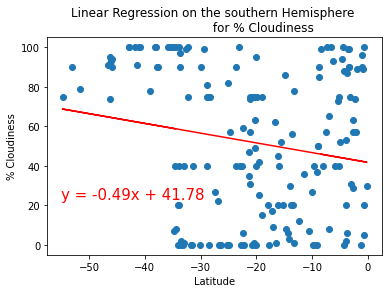

{'slope': '-0.49', 'intercept': '41.78', 'r_value': '-0.18', 'p_value': '0.02', 'std_err': '0.21'}


In [11]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
retValue = plot_linear_regression(x_values, y_values,
                       'Linear Regression on the southern Hemisphere \n \
                        for % Cloudiness', '% Cloudiness',(-55,23))
print(retValue)

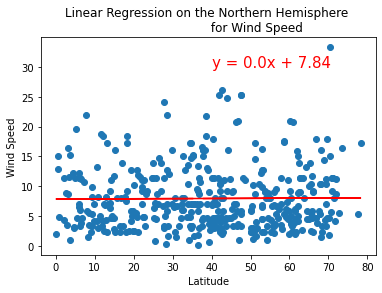

{'slope': '0.00',
 'intercept': '7.84',
 'r_value': '0.01',
 'p_value': '0.87',
 'std_err': '0.01'}

In [12]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(40,30))

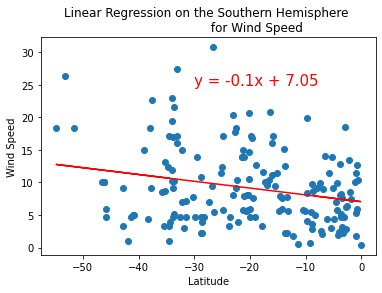

{'slope': '-0.10',
 'intercept': '7.05',
 'r_value': '-0.24',
 'p_value': '0.00',
 'std_err': '0.03'}

In [13]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n \
                        for Wind Speed', 'Wind Speed',(-30,25))